###**GRU**

1.   GRU  stands for Gated Recurrent Unit.

2.   It is another version of RNN(Recurrent Neural Networks) that has 2 gates.

3.   It has fewer parameters than LSTM.

4.   It works with the smaller training data and gives very high accuracy.

5.   It is efficient for modern sequences.

6.   It can work with long term dependencies.

7.   It solves the problem of the Vanishing Gradient Descent.

8.   It works perfectly file with the smaller datasets.

9.   Here in GRU, the training is very much faster with the fewer parameters than the LSTM.

10. It can handle sequential data.



**Steps used in this Algorithm for implementing the Sentiment Project Analysis using RNN GRU:-**

1. Import all the necessary libraries

2. Load the imdb movie dataset

3. Perform the padding on the input sequences of RNN

4. Build the GRU Model

5. Compile the GRU Model

6. Train the GRU Model

7. Evaluate the Model

8. Plot Accuracy & Loss

9. Make Predictions on the Custom Text data

### Step 1: Import all the necessary libraries

In [1]:
import    numpy               as   np
import    pandas              as   pd
import    matplotlib.pyplot   as    plt
import    seaborn             as    sns

import    tensorflow          as    tf


from      tensorflow.keras.datasets                  import    imdb
from      tensorflow.keras.models                    import    Sequential
from      tensorflow.keras.layers                     import   Dense, Dropout,Flatten, BatchNormalization, GRU, Embedding
from      tensorflow.keras.preprocessing.sequence    import    pad_sequences

OBSERVATIONS:

1.        numpy --------------> Computation of the numerical array

2.        pandas --------------> Data Creation and Manipulation

3.        matplotlib -----------> Data Visualization

4.        seaborn -------------> Data Correlation

5.        tensorflow -----------> Deep Learning Framework

6.        imdb -------------> Movie Review dataset that has 50000 labels

7.        pad_sequences --------> makes all the input sequences of equal length

8.        Sequential -----------> forms linear stacks of layers

9.        Embedding -----------> It forms the embedding layer of RNN by converting the integer encoded words into the dense vectors.

10.       GRU  ---------------> It works with the smaller data and provides the best accuracy with the smaller data.

11.       Flatten -------------> converts the 2D / 3D feature maps into 1D vectors.

12.       Dense -------------> forms the dense neural network model

13.       Dropout ------------> Reduces the overfitting

14.       BatchNormalization ---------> normalized the activation

### Step 2: Load the imdb movie dataset

In [2]:
### define the vocabulary size
voc_size = 10000

(X_train, Y_train),(X_test, Y_test)=imdb.load_data(num_words=voc_size)

In [3]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [4]:
X_test

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [5]:
print("Shape of the input training data is:", X_train.shape)
print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (25000,)
Shape of the input testing  data is: (25000,)


In [6]:
Y_train

array([1, 0, 0, ..., 0, 1, 0])

In [7]:
Y_test

array([0, 1, 1, ..., 0, 0, 0])

In [8]:
print("Shape of the output training data is:", Y_train.shape)
print("Shape of the output testing  data is:", Y_test.shape)

Shape of the output training data is: (25000,)
Shape of the output testing  data is: (25000,)


###**OBSERVATIONS:**

1.  The imdb movie review dataset is loaded from imdb module with 10000 most frequent words in it.

2.  Then the data is divided into the input and output training and testing data.

3.  The input training and testing data has all the sequences of unequal length. So padding is applied on it to make all the sequences as equal.

### Step 3: Perform the padding on the input sequences of RNN

In [9]:
### perform the padding on the inputs

### define the maximum length for padding
max_len = 200

X_train = pad_sequences(X_train, maxlen = max_len)

X_test  = pad_sequences(X_test,  maxlen = max_len)

In [10]:
X_train

array([[   5,   25,  100, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [11]:
X_test

array([[   0,    0,    0, ...,   14,    6,  717],
       [1987,    2,   45, ...,  125,    4, 3077],
       [4468,  189,    4, ...,    9,   57,  975],
       ...,
       [   0,    0,    0, ...,   21,  846, 5518],
       [   0,    0,    0, ..., 2302,    7,  470],
       [   0,    0,    0, ...,   34, 2005, 2643]], dtype=int32)

In [12]:
print("Shape of the input training data is:", X_train.shape)
print("Shape of the input testing  data is:", X_test.shape)

Shape of the input training data is: (25000, 200)
Shape of the input testing  data is: (25000, 200)


###**OBSERVATIONS:**

1. Here padding is applied on the inputs(training and testing data) on each and every sequence of it.

2. After applying padding, all the sequences of the input training and testing data are of the same sequence length.

3. Padding is done before training RNN Model as RNN Model can only work with the fixed length input sequences.

4.  There are two types of padding

    (a.)  Pre-padding ---------> Applying zeros before every input sequence

    (b.)  Post-padding --------> Applying zeros after every input sequence

### Step 4: Build the GRU Model

In [13]:
### Construct the GRU Model

gru_model = Sequential([
    ### Define the Embedding layer
    Embedding(input_dim = 10000, output_dim = 128, input_length = max_len)                       ,
    ### Define the GRU layer
    GRU(128)                                                                                     ,
    ### Define the output layer
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
### get the summary of the model

gru_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

###**OBSERVATIONS:**

1. The gru sequential model is initialized.

2. Then an embedding layer is built on the top of the sequential model which accpets the input as 10000 most frequent words and converts every word into 128 dense dimensional vectors with each length as 200.

3. Then GRU Layer is applied on the top of Embedding layer that processes every 128 dense dimensional vectors and

   (a.)  resolves the problem of Vanishing Gradient Descent

   (b.)  remembers the long term sequences

   (c.)  performs efficiently with the smaller training data and gets best accuracy one data after the another

   (d.)   based on it, it can predict the future word.


4. The final output layer is costructed with 1 hidden neuron and sigmoid activation function is applied in it to predict whether the movie review is positive or negative.

### Step 5: Compile the GRU Model

In [15]:
### Compile the model

gru_model.compile(
    optimizer = 'adam'                            ,
    loss      =  'binary_crossentropy'            ,
    metrics   =  ['accuracy']
)

**OBSEVATIONS:**


The RNN Model has been made ready for the training with the help of the following parameters:-


(a.) optimizer = 'adam' -----> It optimizes the weights during the training of the model.

(b.) loss = 'binary_cossentropy' -----> It is used to solve the binay classification poblem

(c.) metrics = ['accuracy'] -------> It is used to evaluate the performance of the model.

### Step 6: Train the GRU Model

In [16]:
history = gru_model.fit(
    X_train                                       ,
    Y_train                                       ,
    epochs                    =       3           ,
    batch_size                =       64          ,
    validation_split          =       0.2
)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 147s 460ms/step - accuracy: 0.6918 - loss: 0.5476 - val_accuracy: 0.8524 - val_loss: 0.3588
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 451ms/step - accuracy: 0.8965 - loss: 0.2626 - val_accuracy: 0.8666 - val_loss: 0.3281
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 456ms/step - accuracy: 0.9297 - loss: 0.1855 - val_accuracy: 0.8590 - val_loss: 0.3389


**OBSERVATIONS:**


1.   The RNN Model has been trained with the help of the following parameters:-

(a.) Training data -------> X_train, Y_train

(b.) epochs = 3 ---------> 3 iterations ae needed to train the model

(c.) batch_size = 64 -----> weights get updated after every 64 samples

(d.) validation_split = 0.2 ----> 20 % of the data is used fo validation.


2.    After the model training, the accuracy of the model has increased while the loss function has reduced. So the model is working completely fine.

### Step 7: Evaluate the Model

In [17]:
loss,  acc = gru_model.evaluate(X_test, Y_test)

print(f"Test Accuracy: {acc:.4f}")

print(f"Test Loss: {loss:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.8560 - loss: 0.3538
Test Accuracy: 0.8586
Test Loss: 0.3473


**OBSERVATIONS:**

1.    After evaluating the RNN Model with the test data, it is known that the test accuracy of the model is very high while the loss function is very less.

2.    So the model is completely fine.

### Step 8: Plot Accuracy & Loss

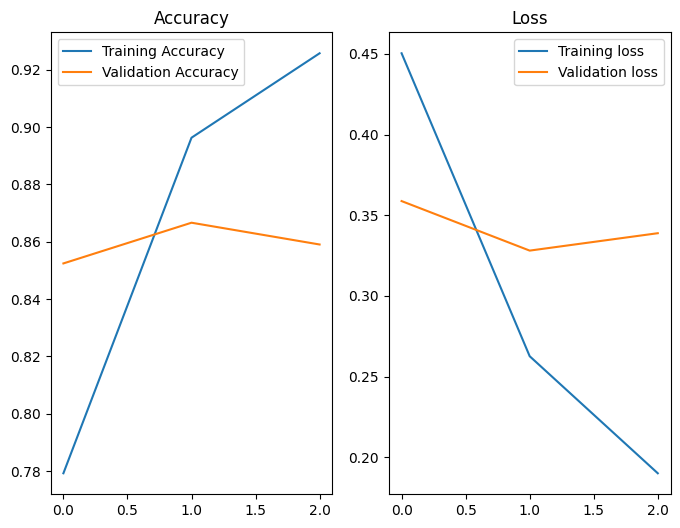

In [18]:
plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Loss')
plt.legend()

plt.show()

###**OBSERVATIONS:**


1.   This code visualizes model performance after training using the history object for the Accuracy and loss.

2. It depicts about the training and Validation accuracy as well as for loss and Validation loss.

### Step 9:  Make Predictions on the Custom Text data

In [19]:

### Get the index of each and every word

word_index = imdb.get_word_index()

### define the function to encode the words into integers
def encoded_review(text):
  ### get the tokens from the text
  tokens = text.lower().split()
  ### check if the token is present in the word index dic if not then assign with 2
  encoded_text = [word_index.get(word,2) for word in tokens]
  ### perform the padding on the encoded text to make all the input sequences as equal length
  encoded_texts = pad_sequences([encoded_text],maxlen=max_len)
  return(encoded_texts)






### define the sample text
sample_text = "This movie was amazing and the actors were brilliant"


res = encoded_review(sample_text)
print(res)

### Make the predictions from the encoded data
predictions = gru_model.predict(res)[0][0]
print(predictions)


if(predictions > 0.5):
  print("Positive Review")
else:
  print("Negative Review")


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0  11  17  13 477   2   1 153
   68 527]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
0.47537968
Negative Review
